# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1 : Perform Data Cleaning

1)Clean a dataset by removing missing values
and outliers.

In [2]:
#To read the file
df=pd.read_csv("Titanic.csv")

In [3]:
#To view the top 5 data
df.head(5)

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [4]:
#To view the null valus
df.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [5]:
#To view the null valus in percentage
df.isnull().sum()*100/len(df)

sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
fare         0.000000
embarked     0.224467
class        0.000000
who          0.000000
alone        0.000000
survived     0.000000
dtype: float64

In [9]:
#We can remove null values by dropping that row or we can fill with mean/median/mode
df["age"].fillna(df["age"].mean(),inplace=True)

In [10]:
#To convert age column from float to int
df["age"].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: age, Length: 891, dtype: int32

In [12]:
df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)

In [13]:
#To view the null valus after removig the null values
df.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

In [15]:
#To select the numerical columns
df.select_dtypes(include="number")

,age,sibsp,parch,fare,survived
0,22.000000,1,0,7.2500,0
1,38.000000,1,0,71.2833,1
2,26.000000,0,0,7.9250,1
3,35.000000,1,0,53.1000,1
4,35.000000,0,0,8.0500,0
...,...,...,...,...,...
886,27.000000,0,0,13.0000,0
887,19.000000,0,0,30.0000,1
888,29.699118,1,2,23.4500,0
889,26.000000,0,0,30.0000,1


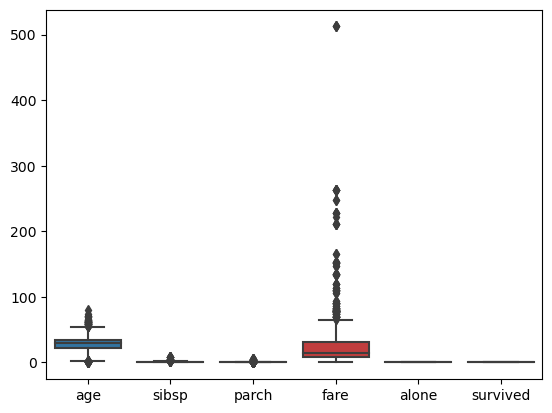

In [18]:
#To view the outliers using Boxplot
sns.boxplot(df)
plt.show()

In [19]:
#Removing Outliers Using IQR Method
for col in ["age","sibsp","parch","fare"]:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    df[col] = df[col][~((df[col]< (q1 - 1.5 * iqr)) |(df[col] > (q3 + 1.5 * iqr)))]

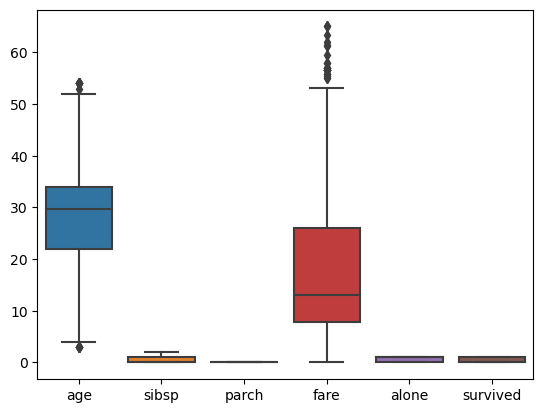

In [21]:
sns.boxplot(df)
plt.show()

In [23]:
#Use of log Transfornation to reduce the outliers
df["age"]=np.log1p(df["age"])
df["fare"]=np.log1p(df["fare"])

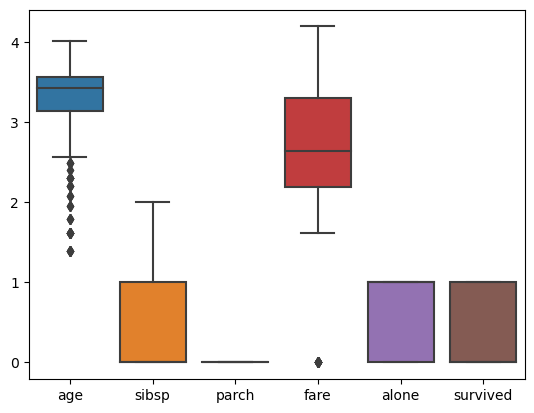

In [24]:
sns.boxplot(df)
plt.show()

In [25]:
#Use of IQR method to reduce the outliers
for col in ["age","fare"]:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_whisker=q1-1.5*iqr
    ser=df[col].copy()
    ser[ser<lower_whisker]=lower_whisker
    df[col]=ser

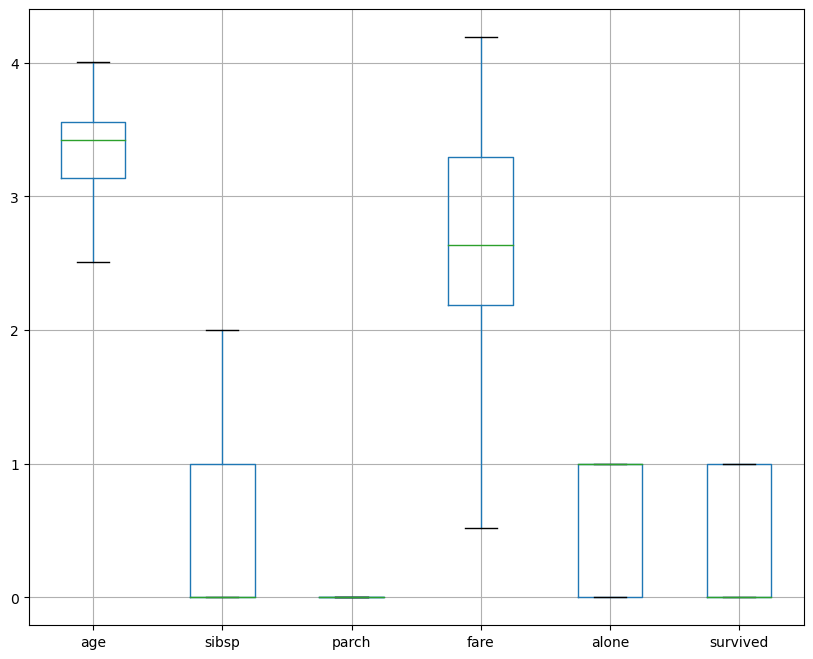

In [31]:
#Overall Boxplot after removing the outliers
df.boxplot(figsize=(10,8))
plt.show()

# Task 2 : Calculate summary statistics

2)Calculate summary statistics (mean, median,
mode, standard deviation) for a dataset

In [32]:
#To view the summary of the numerical data
df.describe()

,age,sibsp,parch,fare,survived
count,825.000000,845.000000,678.0,775.000000,891.000000
mean,3.350354,0.313609,0.0,2.708176,0.383838
std,0.344052,0.530909,0.0,0.678426,0.486592
min,2.505713,0.000000,0.0,0.520193,0.000000
25%,3.135494,0.000000,0.0,2.185579,0.000000
50%,3.424234,0.000000,0.0,2.639057,0.000000
75%,3.555348,1.000000,0.0,3.295837,1.000000
max,4.007333,2.000000,0.0,4.189655,1.000000


In [33]:
#To view the summary of the categorical data
df.describe(include=object)

,sex,embarked,class,who
count,891,891,891,891
unique,2,3,3,3
top,male,S,Third,man
freq,577,646,491,537


In [34]:
#To view the average of the age column
df["age"].mean()

3.350354456278316

In [35]:
#To view the median(middle value)of age
df["age"].median()

3.424233913041968

In [36]:
#To view the standard deviation of the age column
df["age"].std()

0.3440524131435401

In [37]:
#To view the average of the sibsp data
df["sibsp"].mean()

0.3136094674556213

In [38]:
#To view the median(middle value) of sibsp
df["sibsp"].median()

0.0

In [39]:
#To view the standard deviation of the sibsp column
df["sibsp"].std()

0.5309089620420915

In [40]:
#To view the average of the parch data
df["parch"].mean()

0.0

In [41]:
#To view the median(middle value) of parch 
df["parch"].median()

0.0

In [42]:
#To view the standard deviation of the parch column
df["parch"].std()

0.0

In [43]:
#To view the average of the fare data
df["fare"].mean()

2.7081757549941785

In [44]:
#To view the median(middle value) of fare 
df["fare"].median()

2.6390573296152584

In [45]:
#To view the standard deviation of the fare column
df["fare"].std()

0.6784261606377926

In [46]:
#To view the average of the survived data
df["survived"].mean()

0.3838383838383838

In [47]:
#To view the median(middle value) of survived 
df["survived"].median()

0.0

In [48]:
#To view the standard deviation of the survived column
df["survived"].std()

0.4865924542648585

In [54]:
#To view the mode(most frequent value) in the sex column
df["sex"].mode()[0]

'male'

In [56]:
#To view the mode(most frequent value) in the embarked column
df["embarked"].mode()[0]

'S'

In [55]:
#To view the mode(most frequent value) in the class column
df["class"].mode()[0]

'Third'

# Task 3 : Visualization using Histogram

3)Create a histogram or bar chart to visualize
the distribution of data in a dataset

In [57]:
#To read the file
df1=pd.read_csv("Iris.csv")

In [58]:
#To view the top 5 data
df1.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
#To view the summary of the numerical data
df1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [62]:
#To view the summary of the categorical data
df1["Species"].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

We are going to plot histofram for all numerical data to view the distribution of the data

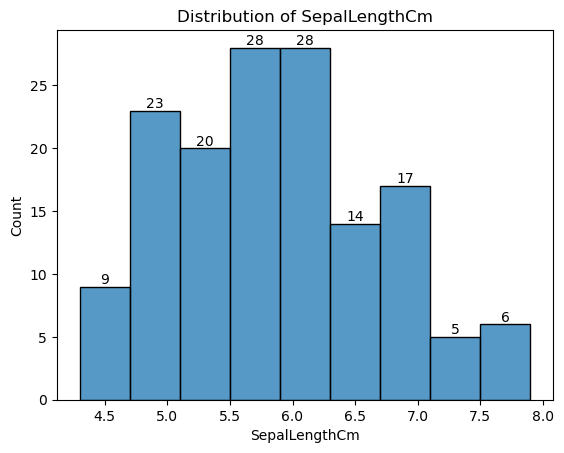

In [72]:
a=sns.histplot(data=df1,x="SepalLengthCm")
for i in a.containers:
    a.bar_label(i,)
plt.title("Distribution of SepalLengthCm")
plt.show()

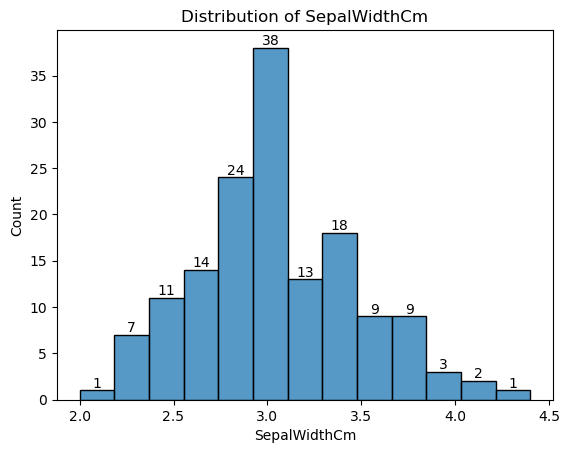

In [69]:
bx=sns.histplot(data=df1,x="SepalWidthCm")
for i in bx.containers:
    bx.bar_label(i,)
plt.title("Distribution of SepalWidthCm")
plt.show()

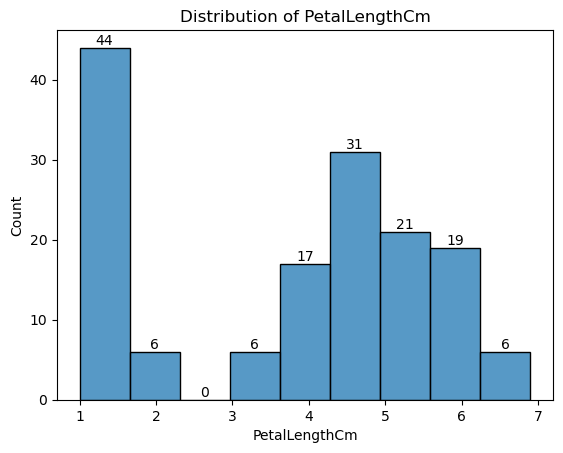

In [70]:
cx=sns.histplot(data=df1,x="PetalLengthCm")
for i in cx.containers:
    cx.bar_label(i,)
plt.title("Distribution of PetalLengthCm")
plt.show()

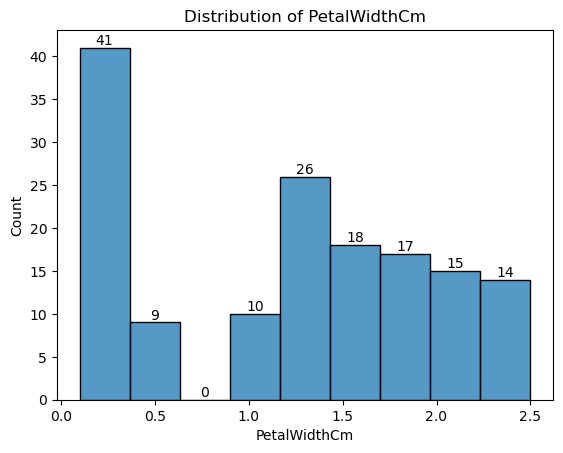

In [71]:
dx=sns.histplot(data=df1,x="PetalWidthCm")
for i in dx.containers:
    dx.bar_label(i,)
plt.title("Distribution of PetalWidthCm")
plt.show()

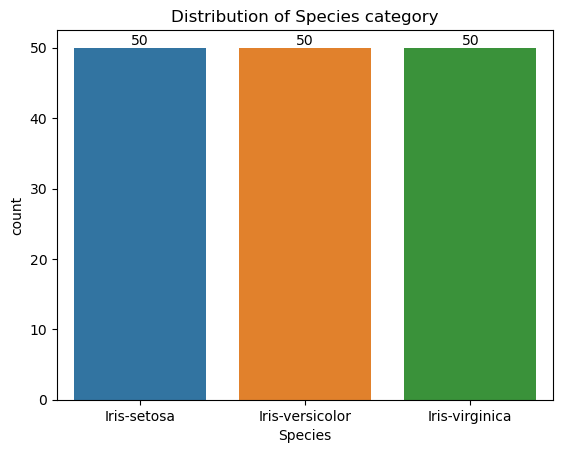

In [82]:
#To plot the count plot for species category
x=sns.countplot(x="Species",data=df1)
for i in x.containers:
    x.bar_label(i,)
plt.title("Distribution of Species category")
plt.show()

# Task 4 : Pivote Table

4)Use pivot tables to summarize data in a
dataset

In [92]:
#To read the file
df2=pd.read_csv("Housing.csv")

In [93]:
#To view the top 5 data
df2.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [95]:
#To view the null valus
df2.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

We are going to summarise the given dataset using Pivot tables

In [101]:
pd.pivot_table(df2,index=["mainroad"],values=["price","area","bedrooms","bathrooms","stories","parking"], aggfunc={'price':'mean','area':'mean','bedrooms':'mean','bathrooms':'mean','stories':'mean','parking':'mean'})

,area,bathrooms,bedrooms,parking,price,stories
mainroad,,,,,,
no,3606.441558,1.233766,2.987013,0.259740,3.398905e+06,1.545455
yes,5404.591880,1.294872,2.961538,0.764957,4.991777e+06,1.848291


In [102]:
pd.pivot_table(df2,index=["guestroom"],values=["price","area","bedrooms","bathrooms","stories","parking"], aggfunc={'price':'mean','area':'mean','bedrooms':'mean','bathrooms':'mean','stories':'mean','parking':'mean'})

,area,bathrooms,bedrooms,parking,price,stories
guestroom,,,,,,
no,5009.000000,1.256696,2.937500,0.678571,4.544546e+06,1.787946
yes,5804.257732,1.422680,3.092784,0.762887,5.792897e+06,1.886598


In [103]:
pd.pivot_table(df2,index=["basement"],values=["price","area","bedrooms","bathrooms","stories","parking"], aggfunc={'price':'mean','area':'mean','bedrooms':'mean','bathrooms':'mean','stories':'mean','parking':'mean'})

,area,bathrooms,bedrooms,parking,price,stories
basement,,,,,,
no,5075.025424,1.248588,2.912429,0.661017,4.509966e+06,1.915254
yes,5290.502618,1.356021,3.062827,0.753927,5.242615e+06,1.602094


In [104]:
pd.pivot_table(df2,index=["hotwaterheating"],values=["price","area","bedrooms","bathrooms","stories","parking"], aggfunc={'price':'mean','area':'mean','bedrooms':'mean','bathrooms':'mean','stories':'mean','parking':'mean'})

,area,bathrooms,bedrooms,parking,price,stories
hotwaterheating,,,,,,
no,5154.928846,1.278846,2.957692,0.680769,4.728593e+06,1.801923
yes,5059.280000,1.440000,3.120000,0.960000,5.559960e+06,1.880000


In [105]:
pd.pivot_table(df2,index=["airconditioning"],values=["price","area","bedrooms","bathrooms","stories","parking"], aggfunc={'price':'mean','area':'mean','bedrooms':'mean','bathrooms':'mean','stories':'mean','parking':'mean'})

,area,bathrooms,bedrooms,parking,price,stories
airconditioning,,,,,,
no,4823.109920,1.222520,2.884718,0.600536,4.191940e+06,1.632708
yes,5860.610465,1.424419,3.139535,0.895349,6.013221e+06,2.180233


In [106]:
pd.pivot_table(df2,index=["prefarea"],values=["price","area","bedrooms","bathrooms","stories","parking"], aggfunc={'price':'mean','area':'mean','bedrooms':'mean','bathrooms':'mean','stories':'mean','parking':'mean'})

,area,bathrooms,bedrooms,parking,price,stories
prefarea,,,,,,
no,4868.517986,1.268585,2.932854,0.649880,4.425299e+06,1.784173
yes,6069.320312,1.343750,3.070312,0.835938,5.879046e+06,1.875000


In [107]:
pd.pivot_table(df2,index=["furnishingstatus"],values=["price","area","bedrooms","bathrooms","stories","parking"], aggfunc={'price':'mean','area':'mean','bedrooms':'mean','bathrooms':'mean','stories':'mean','parking':'mean'})

,area,bathrooms,bedrooms,parking,price,stories
furnishingstatus,,,,,,
furnished,5688.100000,1.378571,3.064286,0.885714,5.495696e+06,1.942857
semi-furnished,5166.339207,1.303965,3.008811,0.735683,4.907524e+06,1.801762
unfurnished,4707.595506,1.191011,2.831461,0.488764,4.013831e+06,1.702247


# Task 5 : Remove Duplication

5)Identify and remove duplicate values in a
dataset.

In [97]:
#To view the top 5 data
df1.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [98]:
#To fing the diplicate values in the data
df.duplicated().sum()

0

There is no duplicate values in the data,if it exists we can use drop_duplicates function to remove the duplicate values